In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
data = pd.read_csv('sample.txt', sep=" ", header = None, skiprows = 5)
print data.head
print '\n Data Types:'
print data.dtypes

<bound method DataFrame.head of     0       1       2       3       4       5       6       7       8    \
0   CAL  121.83  122.26  123.94  122.11  120.58  127.86  123.64  118.37   
1   UCB   52.34   50.89   47.62   51.16   52.40   50.79   51.02   50.99   
2   RIT  100.21   99.33  102.87  110.63  110.72  109.25  105.34  112.24   
3  UCLA   12.50   27.22    9.32   16.07    3.86   25.55   28.10    6.50   
4  UCSC  249.58  244.24  242.56  245.13  245.35  237.96  244.83  244.98   
5   UFL   20.21   19.77   21.34   20.21   21.17   23.53   24.87   24.76   
6  UMAD  109.39  120.49  131.35  127.97  121.38  145.50  136.10  101.45   
7  RICE  126.30  128.00  129.08  129.28  124.44  122.91  124.70  129.41   
8   UMD  102.96  103.62   98.22   96.60   99.10   95.92  101.74  101.35   
9    BU  213.77  193.51  178.53  180.08  208.29  166.44  173.77  225.70   

      9     ...         496      497      498      499      500      501  \
0  124.30   ...      131.48   122.71   128.69   131.28   121.42   

In [11]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [12]:
data = data.transpose()
print data.head

<bound method DataFrame.head of           0      1        2      3       4      5       6       7       8  \
0       CAL    UCB      RIT   UCLA    UCSC    UFL    UMAD    RICE     UMD   
1    121.83  52.34   100.21   12.5  249.58  20.21  109.39   126.3  102.96   
2    122.26  50.89    99.33  27.22  244.24  19.77  120.49     128  103.62   
3    123.94  47.62   102.87   9.32  242.56  21.34  131.35  129.08   98.22   
4    122.11  51.16   110.63  16.07  245.13  20.21  127.97  129.28    96.6   
5    120.58   52.4   110.72   3.86  245.35  21.17  121.38  124.44    99.1   
6    127.86  50.79   109.25  25.55  237.96  23.53   145.5  122.91   95.92   
7    123.64  51.02   105.34   28.1  244.83  24.87   136.1   124.7  101.74   
8    118.37  50.99   112.24    6.5  244.98  24.76  101.45  129.41  101.35   
9     124.3   51.3    111.5  29.76  250.49  23.53  111.91  117.72  102.21   
10    126.5  50.21    109.4   6.82  244.85   26.1  126.09   124.5   95.76   
11    120.8  48.66   114.01   4.05  232.89  

In [13]:
data.columns = data.iloc[0]
data = data.reindex(data.index.drop(0))

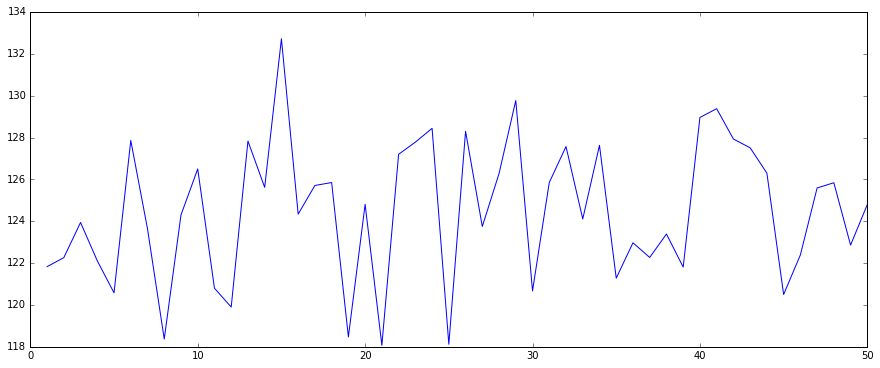

In [14]:
ts = data[data.columns[0]]
plt.plot(ts[0:50])

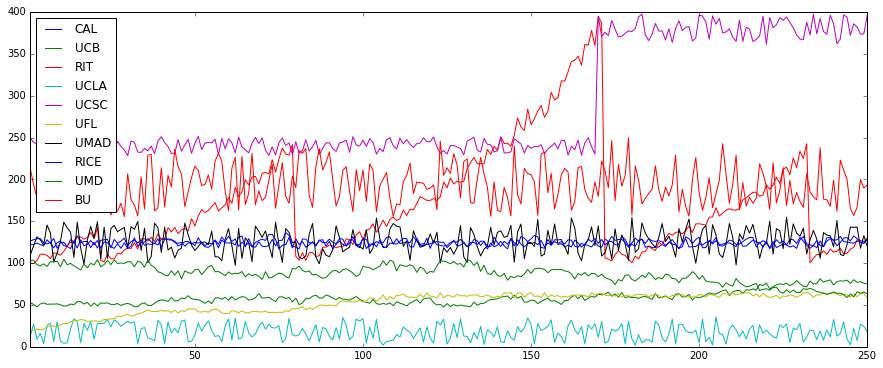

In [15]:
data[0:250].plot(kind='line')

plt.legend(loc='upper left')

plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() # pd.rolling_mean(timeseries, window=12)
    rolstd =  timeseries.rolling(window=12,center=False).std() # pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dftest[0] < value)
    print dfoutput
    return dftest[0] < dfoutput['Critical Value (1%)']

CAL


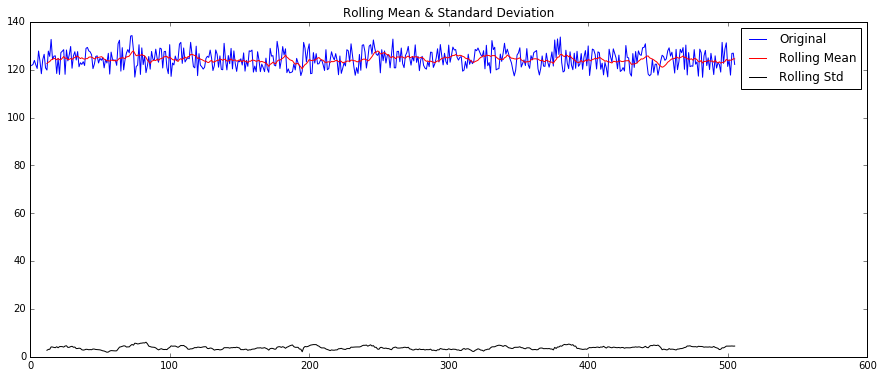

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.445278e+01
p-value                        7.053356e-27
#Lags Used                     1.000000e+00
Number of Observations Used    5.030000e+02
Critical Value (5%)           -2.867303e+00
Critical Value (1%)           -3.443418e+00
Critical Value (10%)          -2.569840e+00
dtype: float64
UCB


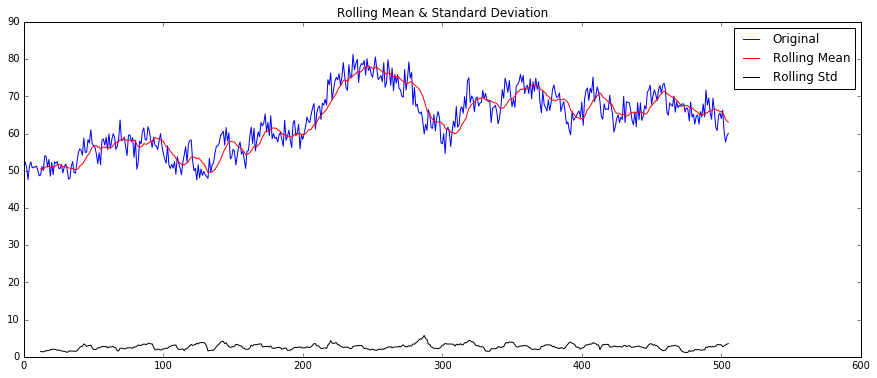

Results of Dickey-Fuller Test:
False
False
False
Test Statistic                  -2.457084
p-value                          0.126268
#Lags Used                       3.000000
Number of Observations Used    501.000000
Critical Value (5%)             -2.867326
Critical Value (1%)             -3.443470
Critical Value (10%)            -2.569852
dtype: float64
RIT


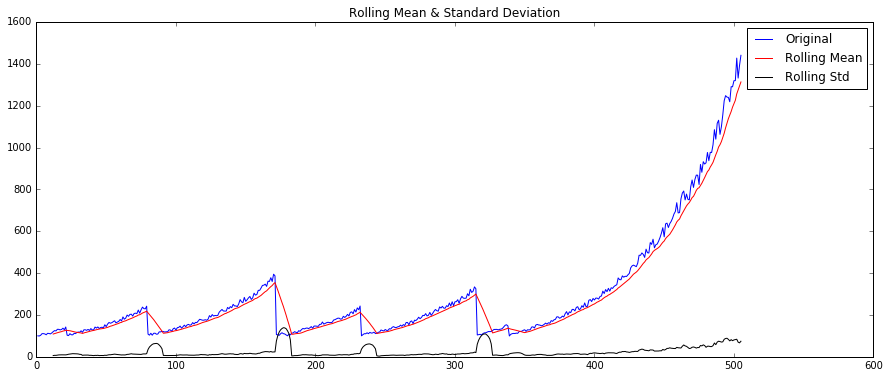

Results of Dickey-Fuller Test:
False
False
False
Test Statistic                   4.656962
p-value                          1.000000
#Lags Used                       2.000000
Number of Observations Used    502.000000
Critical Value (5%)             -2.867315
Critical Value (1%)             -3.443444
Critical Value (10%)            -2.569846
dtype: float64
UCLA


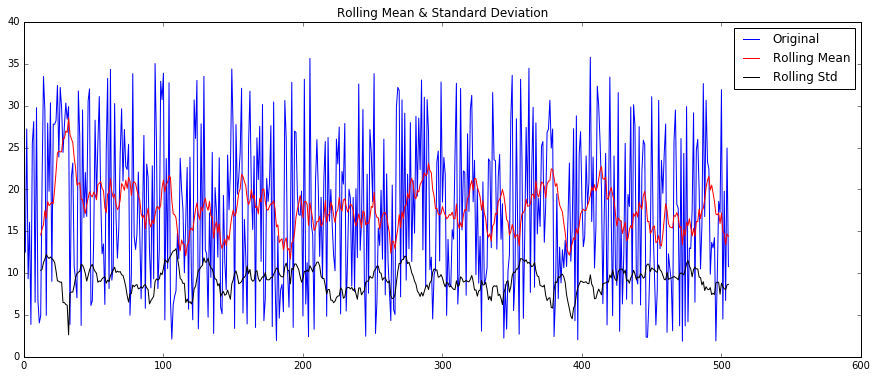

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                 -24.212390
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    504.000000
Critical Value (5%)             -2.867292
Critical Value (1%)             -3.443392
Critical Value (10%)            -2.569833
dtype: float64
UCSC


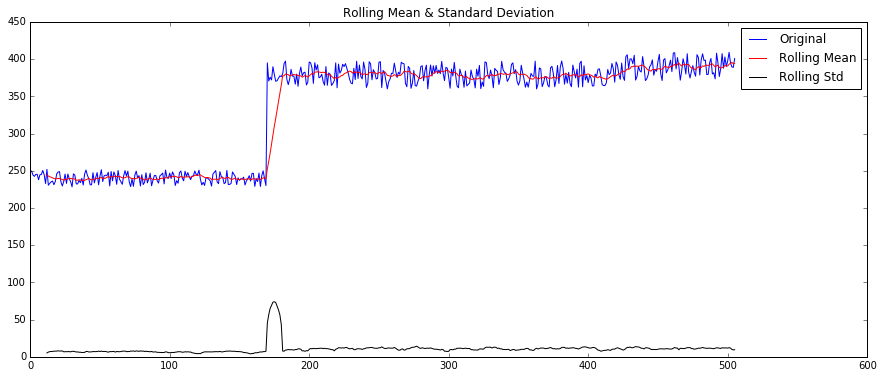

Results of Dickey-Fuller Test:
False
False
False
Test Statistic                  -1.310772
p-value                          0.624230
#Lags Used                       3.000000
Number of Observations Used    501.000000
Critical Value (5%)             -2.867326
Critical Value (1%)             -3.443470
Critical Value (10%)            -2.569852
dtype: float64
UFL


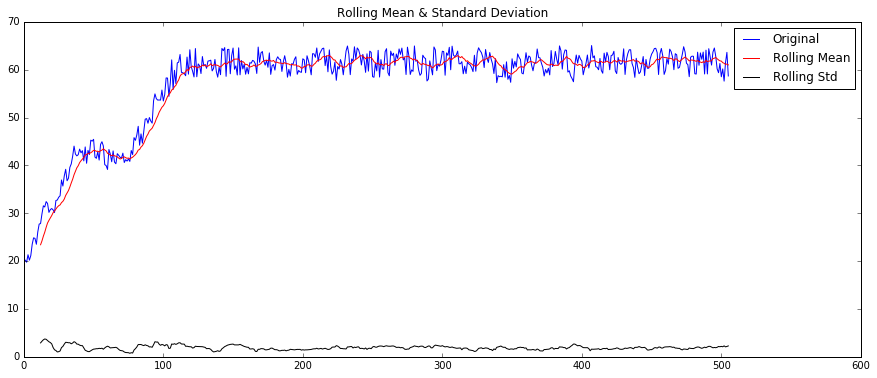

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                  -5.344779
p-value                          0.000004
#Lags Used                       6.000000
Number of Observations Used    498.000000
Critical Value (5%)             -2.867361
Critical Value (1%)             -3.443549
Critical Value (10%)            -2.569870
dtype: float64
UMAD


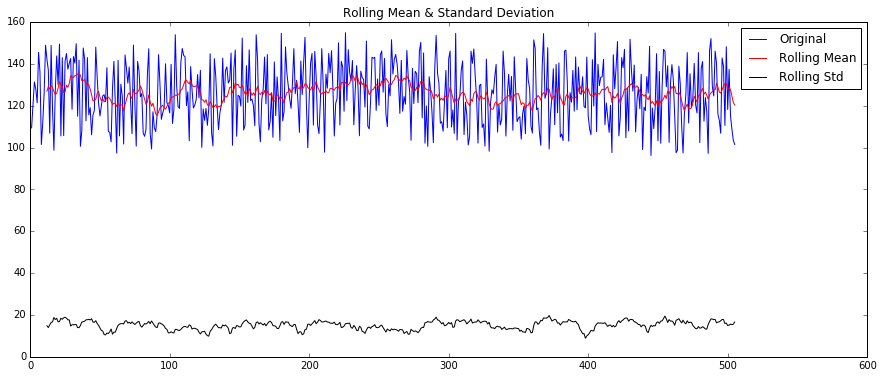

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -6.879055e+00
p-value                        1.449202e-09
#Lags Used                     7.000000e+00
Number of Observations Used    4.970000e+02
Critical Value (5%)           -2.867373e+00
Critical Value (1%)           -3.443576e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
RICE


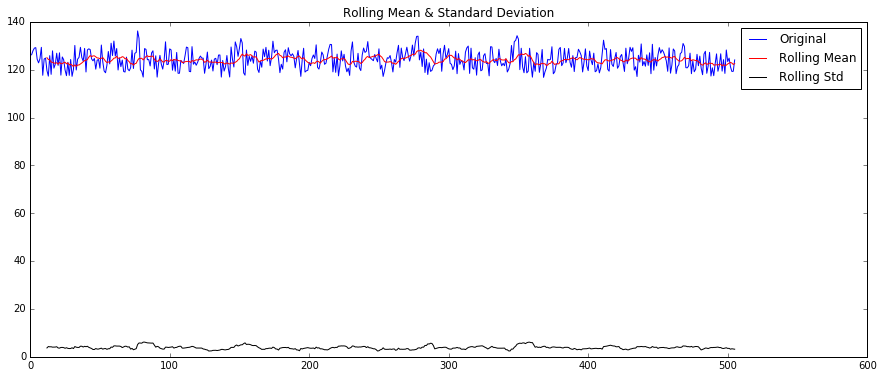

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                 -20.086497
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    504.000000
Critical Value (5%)             -2.867292
Critical Value (1%)             -3.443392
Critical Value (10%)            -2.569833
dtype: float64
UMD


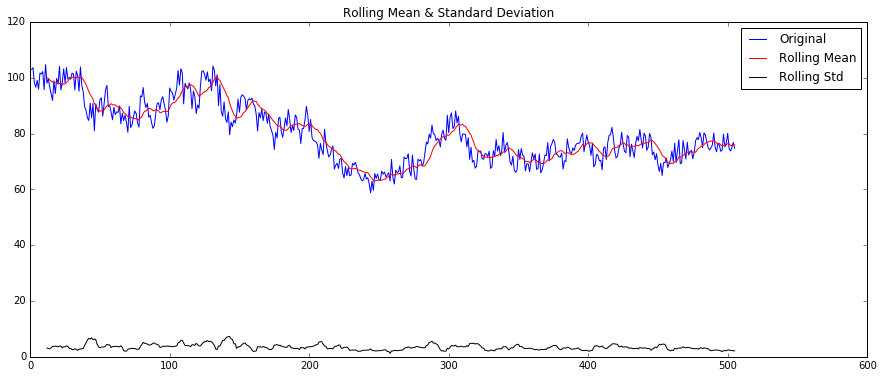

Results of Dickey-Fuller Test:
False
False
False
Test Statistic                  -2.382195
p-value                          0.146825
#Lags Used                       4.000000
Number of Observations Used    500.000000
Critical Value (5%)             -2.867338
Critical Value (1%)             -3.443496
Critical Value (10%)            -2.569858
dtype: float64
BU


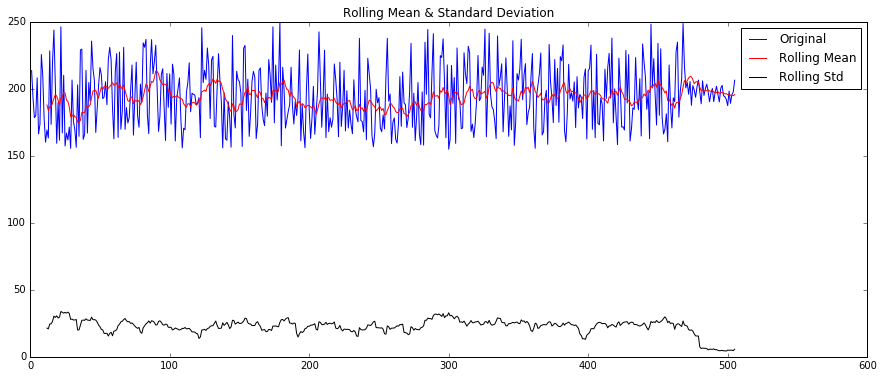

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -7.053016e+00
p-value                        5.464567e-10
#Lags Used                     8.000000e+00
Number of Observations Used    4.960000e+02
Critical Value (5%)           -2.867385e+00
Critical Value (1%)           -3.443603e+00
Critical Value (10%)          -2.569883e+00
dtype: float64
['CAL', 'UCLA', 'UFL', 'UMAD', 'RICE', 'BU']
['UCB', 'RIT', 'UCSC', 'UMD']


In [17]:
N=len(data[data.columns[0]])
TS = []
nonTS = []
for i in data.columns:
    ts = data[i][0:N]
    print(i)
    if test_stationarity(ts):
        TS.append(i)
    else:
        nonTS.append(i)
    #plt.plot(ts)
print(TS)
print(nonTS)

In [18]:
nonTS

['UCB', 'RIT', 'UCSC', 'UMD']

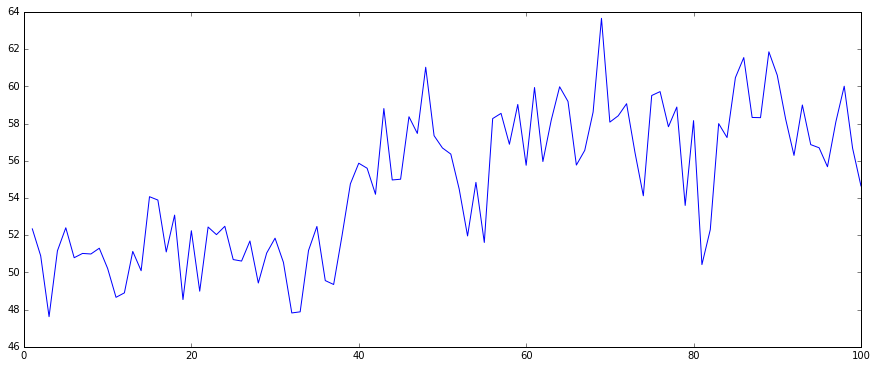

In [66]:
i=nonTS[0]    
ts = data[i][0:N]
plt.plot(ts)



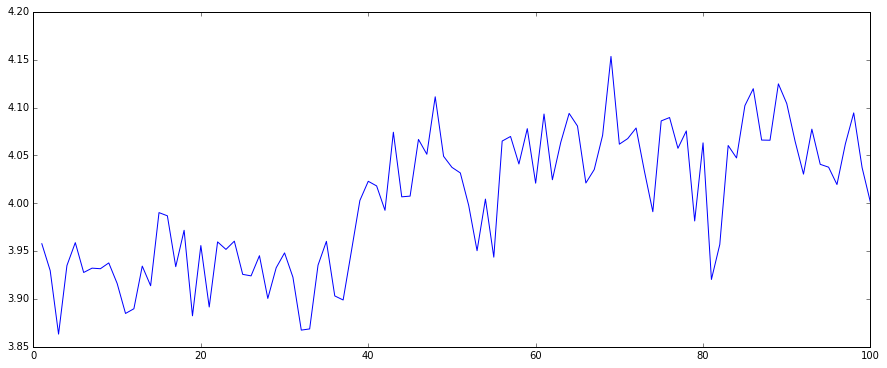

In [67]:
# log transformation
ts = ts.astype(float)
ts_log = np.log(ts)
plt.plot(ts_log)


/home/andrew/python-apps/trading/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=2,ignore_na=False,min_periods=0,adjust=True).mean()
  app.launch_new_instance()


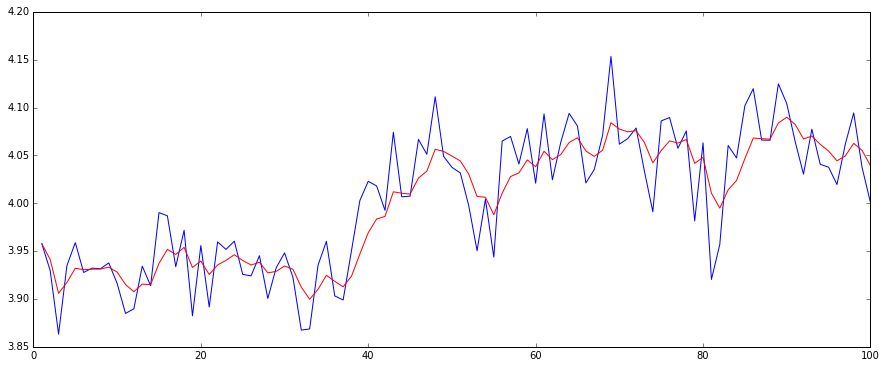

In [68]:
# Subtract exponential moving average

expwighted_avg = pd.ewma(ts_log, halflife=2)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

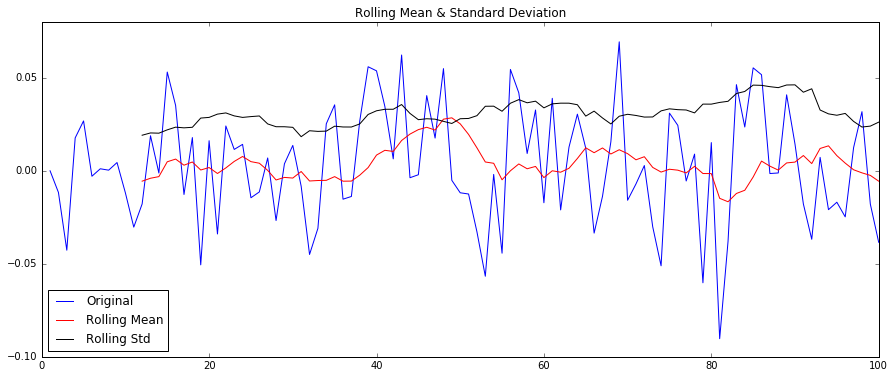

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -8.318221e+00
p-value                        3.631766e-13
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (5%)           -2.891208e+00
Critical Value (1%)           -3.498198e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


True

In [69]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

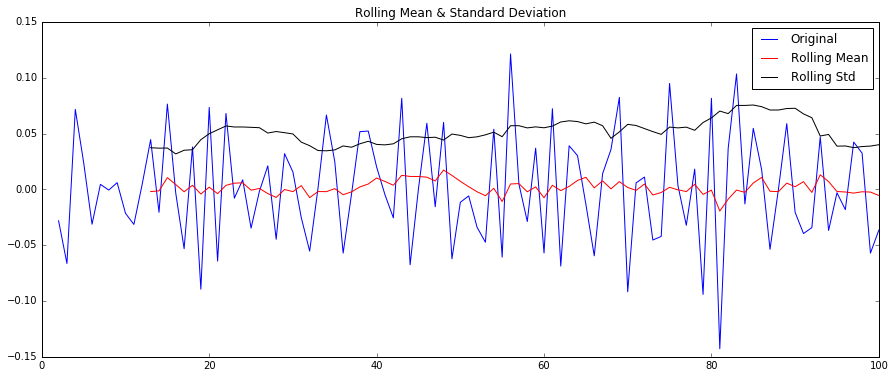

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -5.888475e+00
p-value                        2.962805e-07
#Lags Used                     6.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (5%)           -2.893508e+00
Critical Value (1%)           -3.503515e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


True

In [72]:
# Alternatively, try differencing to get closer to stationary
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

UCB


/home/andrew/python-apps/trading/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=2,ignore_na=False,min_periods=0,adjust=True).mean()


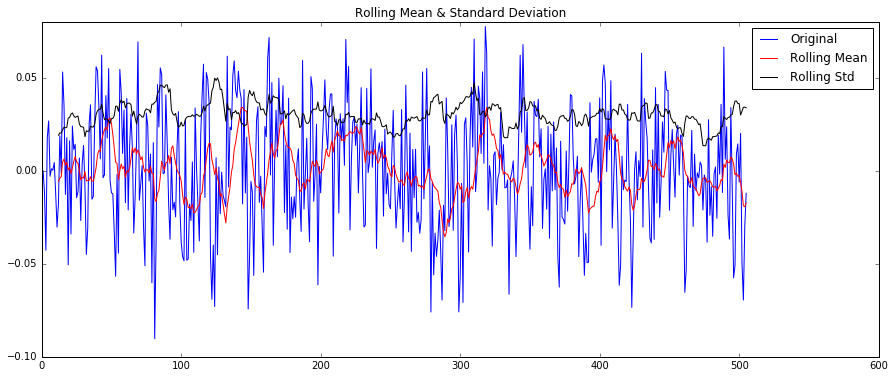

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.213693e+01
p-value                        1.685200e-22
#Lags Used                     1.000000e+00
Number of Observations Used    5.030000e+02
Critical Value (5%)           -2.867303e+00
Critical Value (1%)           -3.443418e+00
Critical Value (10%)          -2.569840e+00
dtype: float64
['UCB']
[]
RIT


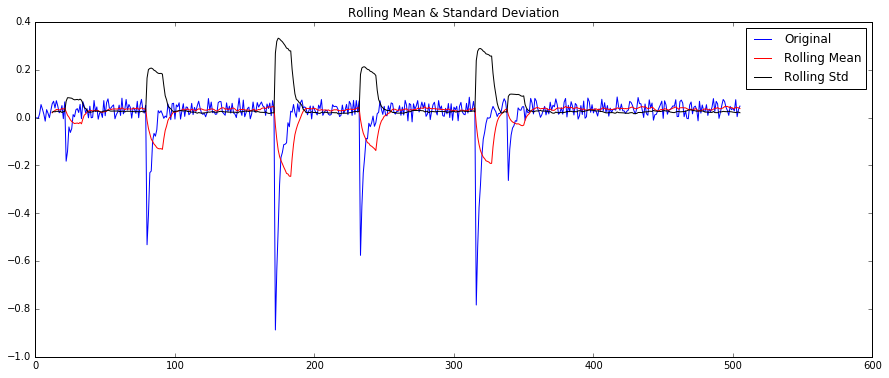

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.047761e+01
p-value                        1.237283e-18
#Lags Used                     0.000000e+00
Number of Observations Used    5.040000e+02
Critical Value (5%)           -2.867292e+00
Critical Value (1%)           -3.443392e+00
Critical Value (10%)          -2.569833e+00
dtype: float64
['UCB', 'RIT']
[]
UCSC


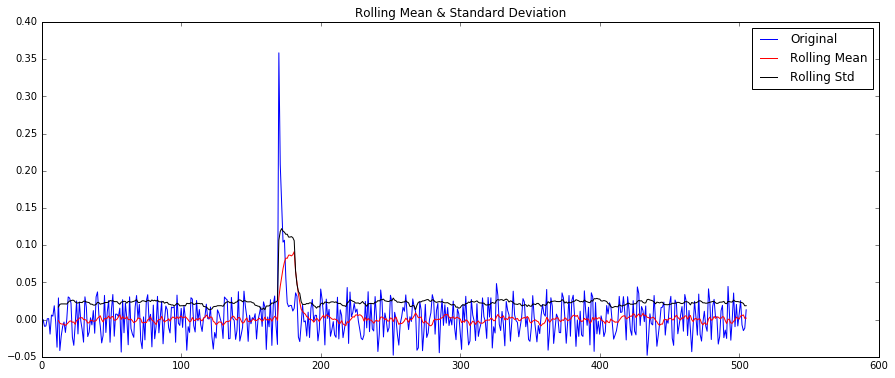

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -8.417460e+00
p-value                        2.025509e-13
#Lags Used                     3.000000e+00
Number of Observations Used    5.010000e+02
Critical Value (5%)           -2.867326e+00
Critical Value (1%)           -3.443470e+00
Critical Value (10%)          -2.569852e+00
dtype: float64
['UCB', 'RIT', 'UCSC']
[]
UMD


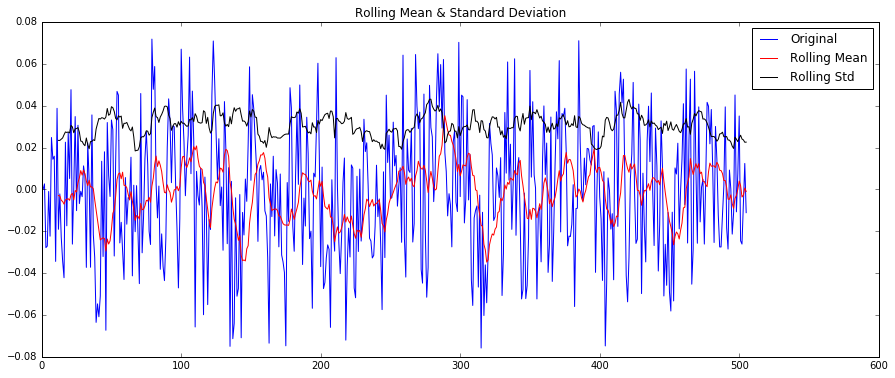

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -8.335152e+00
p-value                        3.287567e-13
#Lags Used                     7.000000e+00
Number of Observations Used    4.970000e+02
Critical Value (5%)           -2.867373e+00
Critical Value (1%)           -3.443576e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
['UCB', 'RIT', 'UCSC', 'UMD']
[]


In [22]:
 # Loop time
log_ewma_diff_TS = []
nonlog_ewma_diff_TS = []
for i in nonTS:    
    print(i)
    ts = data[i][0:N]
    ts = ts.astype(float)
    ts_log = np.log(ts)
    expwighted_avg = pd.ewma(ts_log, halflife=2)
    ts_log_ewma_diff = ts_log - expwighted_avg
    if test_stationarity(ts_log_ewma_diff):
        log_ewma_diff_TS.append(i)
    else:
        nonlog_ewma_diff_TS.append(i)
    print(log_ewma_diff_TS)
    print(nonlog_ewma_diff_TS)

In [23]:
# only stock still not stationary!
#plt.plot(data['UFL'])
log_diff_TS = []
nonlog_diff_TS = []
for i in nonlog_ewma_diff_TS:
    print(i)
    ts = data[i][0:N]
    ts = ts.astype(float)
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    ts_log_diff.dropna(inplace=True)
    if test_stationarity(ts_log_diff):
        log_diff_TS.append(i)
    else:
        nonlog_diff_TS.append(i)
    print(log_diff_TS)
    print(nonlog_diff_TS)

In [24]:
# Summary:
print TS
print log_ewma_diff_TS
print log_diff_TS
print nonlog_diff_TS

['CAL', 'UCLA', 'UFL', 'UMAD', 'RICE', 'BU']
['UCB', 'RIT', 'UCSC', 'UMD']
[]
[]


In [1]:
# TODO:
#      Perform regression on stationary TS
#      Set Buy/Sell thresholds, use cv to tune parameters
#      Contrast with ARIMA model?

In [8]:
%%latex
\[\int x^2\,dx=\frac 13 x^3+C\]
Just found out about ipython's latex capabilities.  Cool!

<IPython.core.display.Latex object>

CAL


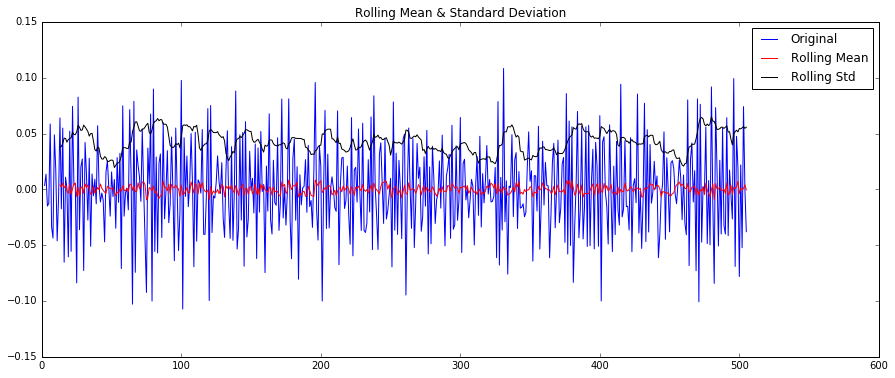

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.083295e+01
p-value                        1.689848e-19
#Lags Used                     1.800000e+01
Number of Observations Used    4.850000e+02
Critical Value (5%)           -2.867518e+00
Critical Value (1%)           -3.443905e+00
Critical Value (10%)          -2.569954e+00
dtype: float64
['CAL']
[]
UCB


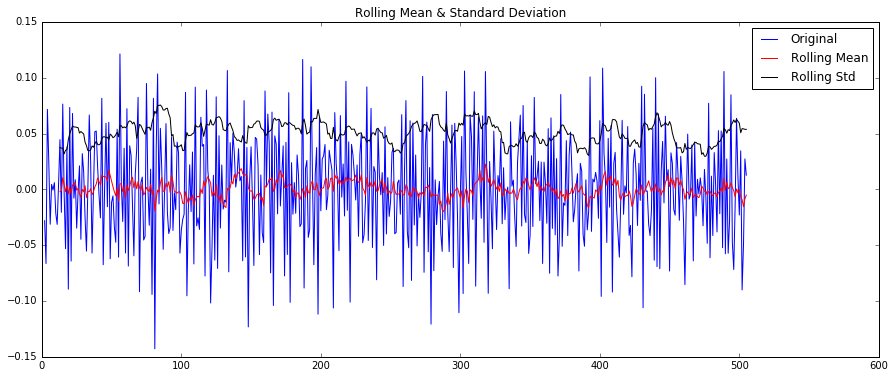

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.761558e+01
p-value                        3.860789e-30
#Lags Used                     2.000000e+00
Number of Observations Used    5.010000e+02
Critical Value (5%)           -2.867326e+00
Critical Value (1%)           -3.443470e+00
Critical Value (10%)          -2.569852e+00
dtype: float64
['CAL', 'UCB']
[]
RIT


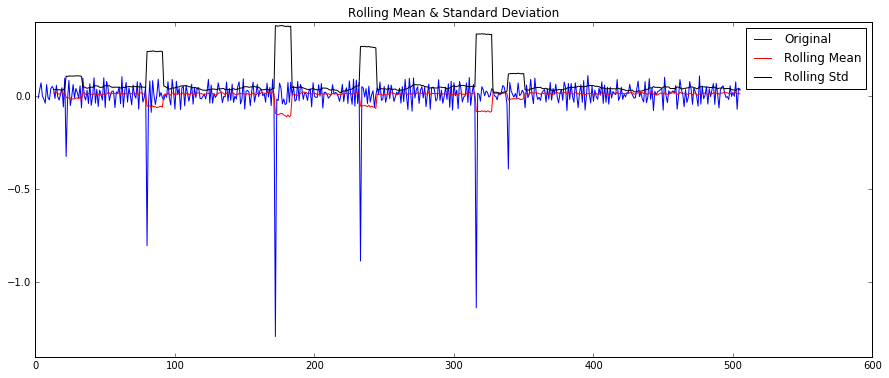

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                 -24.301989
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    503.000000
Critical Value (5%)             -2.867303
Critical Value (1%)             -3.443418
Critical Value (10%)            -2.569840
dtype: float64
['CAL', 'UCB', 'RIT']
[]
UCLA


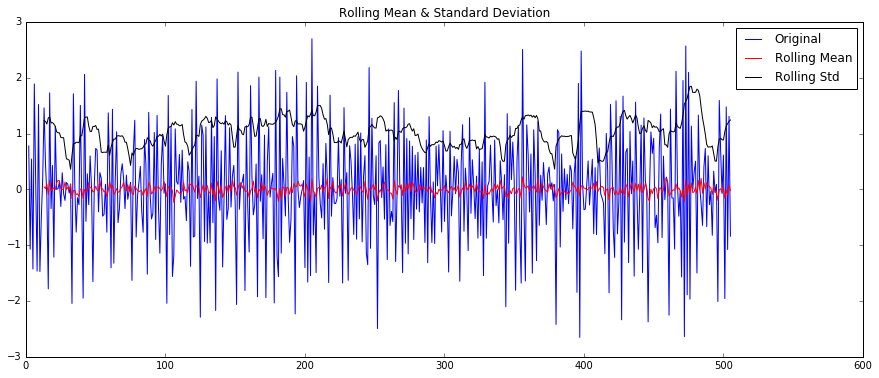

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.034906e+01
p-value                        2.565102e-18
#Lags Used                     1.300000e+01
Number of Observations Used    4.900000e+02
Critical Value (5%)           -2.867457e+00
Critical Value (1%)           -3.443766e+00
Critical Value (10%)          -2.569921e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA']
[]
UCSC


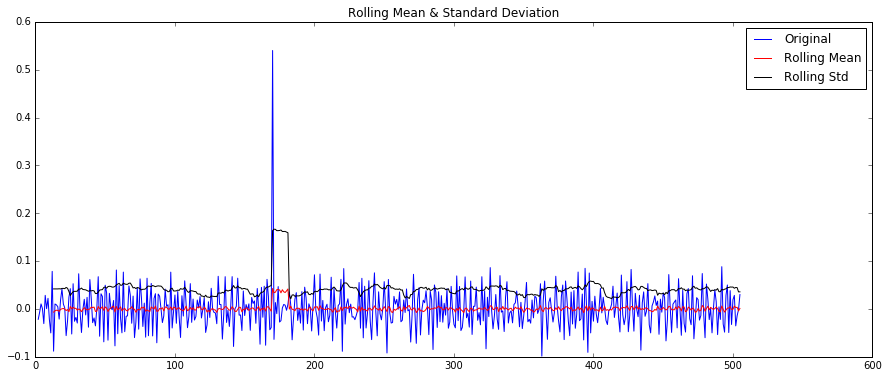

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                 -19.014001
p-value                          0.000000
#Lags Used                       2.000000
Number of Observations Used    501.000000
Critical Value (5%)             -2.867326
Critical Value (1%)             -3.443470
Critical Value (10%)            -2.569852
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC']
[]
UFL


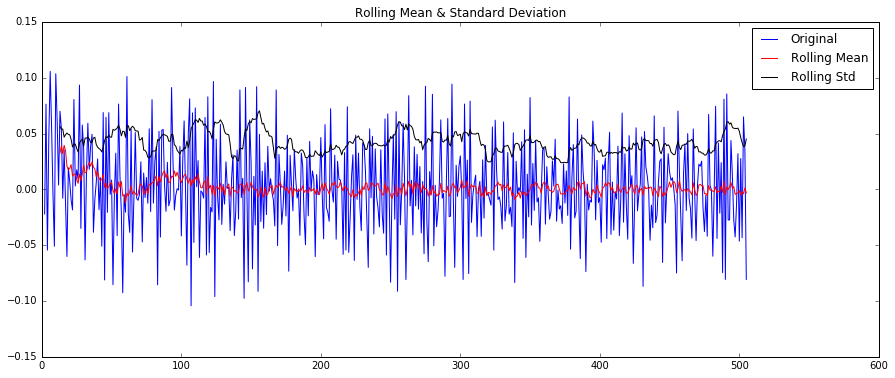

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.269610e+01
p-value                        1.105287e-23
#Lags Used                     4.000000e+00
Number of Observations Used    4.990000e+02
Critical Value (5%)           -2.867350e+00
Critical Value (1%)           -3.443523e+00
Critical Value (10%)          -2.569864e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC', 'UFL']
[]
UMAD


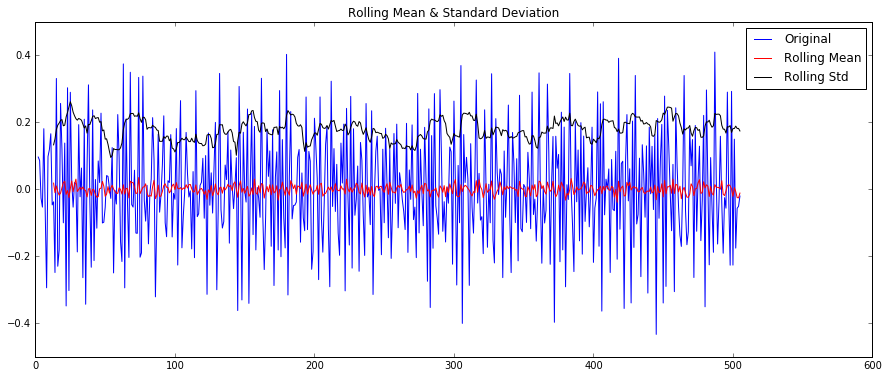

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.095833e+01
p-value                        8.450170e-20
#Lags Used                     1.200000e+01
Number of Observations Used    4.910000e+02
Critical Value (5%)           -2.867444e+00
Critical Value (1%)           -3.443739e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC', 'UFL', 'UMAD']
[]
RICE


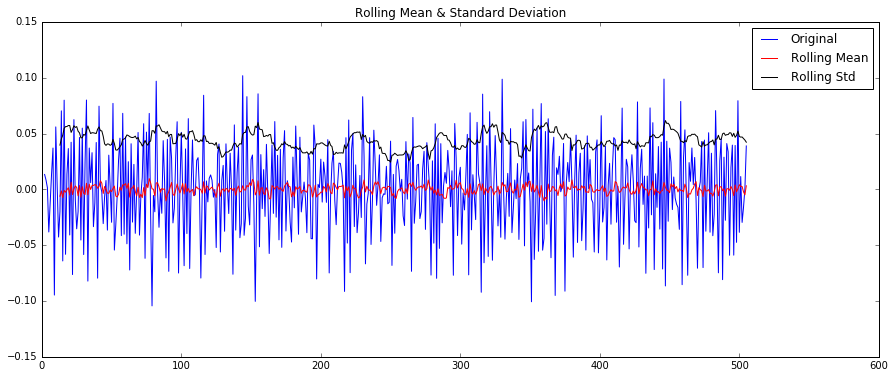

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -9.899911e+00
p-value                        3.379381e-17
#Lags Used                     1.700000e+01
Number of Observations Used    4.860000e+02
Critical Value (5%)           -2.867505e+00
Critical Value (1%)           -3.443877e+00
Critical Value (10%)          -2.569947e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC', 'UFL', 'UMAD', 'RICE']
[]
UMD


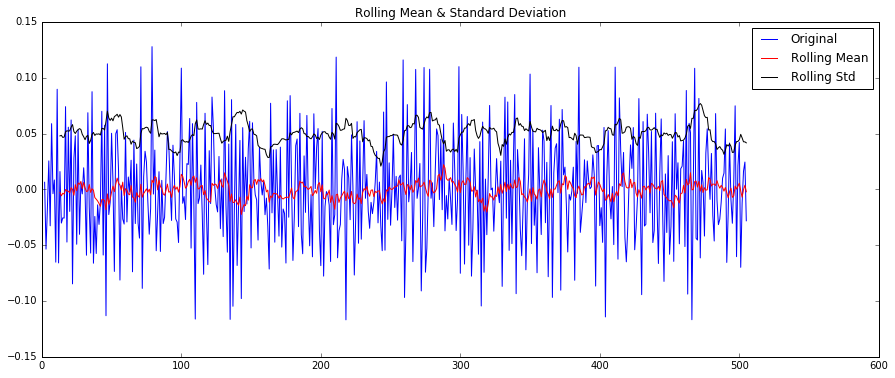

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -1.490263e+01
p-value                        1.499052e-27
#Lags Used                     3.000000e+00
Number of Observations Used    5.000000e+02
Critical Value (5%)           -2.867338e+00
Critical Value (1%)           -3.443496e+00
Critical Value (10%)          -2.569858e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC', 'UFL', 'UMAD', 'RICE', 'UMD']
[]
BU


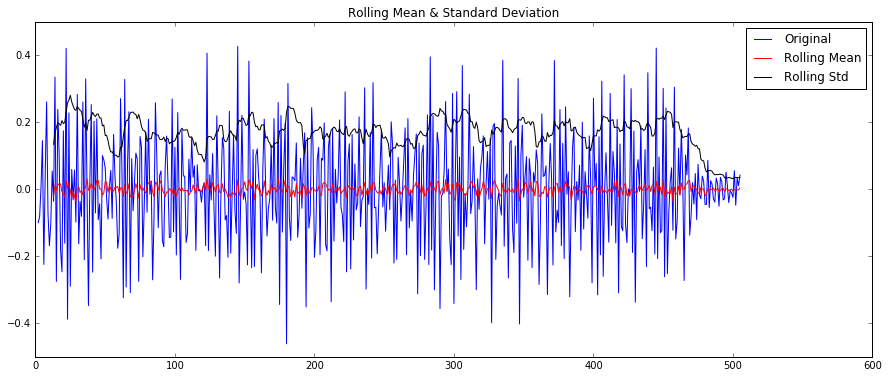

Results of Dickey-Fuller Test:
True
True
True
Test Statistic                -9.503964e+00
p-value                        3.386227e-16
#Lags Used                     1.600000e+01
Number of Observations Used    4.870000e+02
Critical Value (5%)           -2.867493e+00
Critical Value (1%)           -3.443849e+00
Critical Value (10%)          -2.569941e+00
dtype: float64
['CAL', 'UCB', 'RIT', 'UCLA', 'UCSC', 'UFL', 'UMAD', 'RICE', 'UMD', 'BU']
[]


In [26]:
# Try a different approach. Replace ALL (stationary or not) TS with TS_log_diff
# Q: Are all the resulting TS stationary?
alt_log_diff_TS = []
alt_nonlog_diff_TS = []
for i in data.columns:
    print(i)
    ts = data[i][0:N]
    ts = ts.astype(float)
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    ts_log_diff.dropna(inplace=True)
    if test_stationarity(ts_log_diff):
        alt_log_diff_TS.append(i)
    else:
        alt_nonlog_diff_TS.append(i)
    print(alt_log_diff_TS)
    print(alt_nonlog_diff_TS)


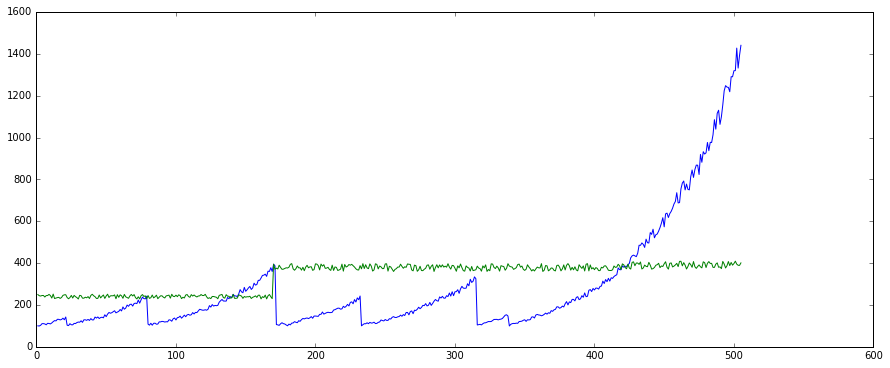

In [31]:
# (log_diff of RIT and UCSC looked strange)
plt.plot(data['RIT'])
plt.plot(data['UCSC'])

In [32]:
def log_diff(ts):
    ts = ts.astype(float)
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    ts_log_diff.dropna(inplace=True)
    return ts_log_diff

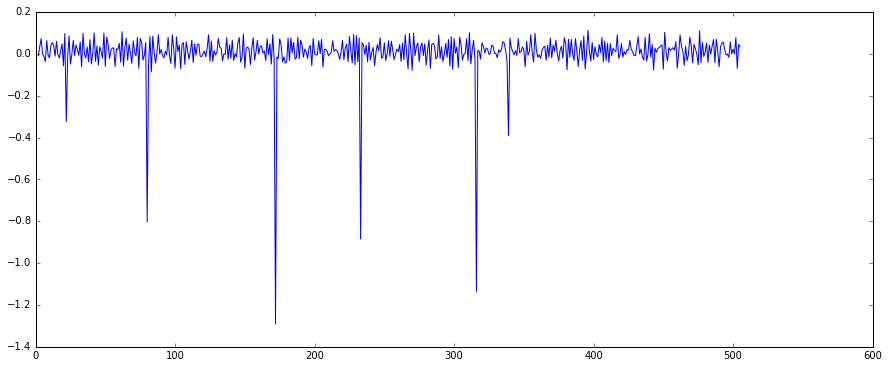

In [33]:
plt.plot(log_diff(data['RIT']))

In [50]:
origts = data['RIT']
ts = log_diff(data['RIT'])

In [51]:
# ========================
# Model for Original Data
# ========================
 
# Get the linear models
lm_orig= np.polyfit(origts.index, origts.values, 1)
 
# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_orig[0] + lm_orig[1]) for i in origts.index))
 
# Put in to a data frame, to keep is all nice
lm_orig_plot = pd.DataFrame({
'time' : r_x,
'prices' : r_y
})


In [77]:
# http://stamfordresearch.com/linear-regression-using-pandas-python/
lm_log = np.polyfit(ts.index, ts.values, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_log[0] + lm_log[1]) for i in ts.index))

# Put in to a data frame, to keep is all nice
lm_log_plot = pd.DataFrame({
'time' : r_x,
'log returns' : r_y
})

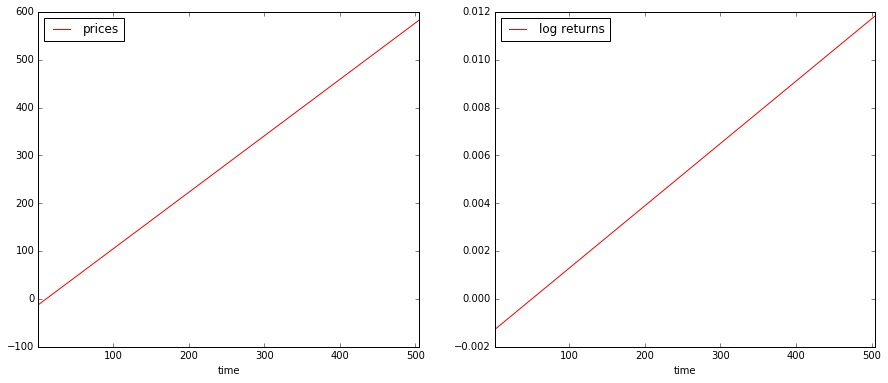

In [78]:
# ========================
# Plot the data
# ========================
fig, axes = plt.subplots(nrows=1, ncols=2)
 
# Plot the original data and model
#origts.plot(kind='scatter', color='Blue', x='time', y='prices', ax=axes[0], title='Original Values')
lm_orig_plot.plot(kind='line', color='Red', x='time', y='prices', ax=axes[0])
 
# Plot the log transformed data and model
#ts.plot(color='Blue', x='time', y='log returns', ax=axes[1], title='Log Values')
#ts.plot()
lm_log_plot.plot(kind='line', color='Red', x='time', y='log returns', ax=axes[1])
 
plt.show()

In [68]:
# TODO:
#      Perform regression on stationary TS (check)
#           Question: If the above procedure is done for data up to t=N.  How long until the model is "no good"?
#      Set Buy/Sell thresholds, use cv to tune parameters
#      Contrast with ARIMA model?

0.01980262729617973

In [79]:
p = np.poly1d(lm_log); p

poly1d([  2.60772276e-05,  -1.32158691e-03])

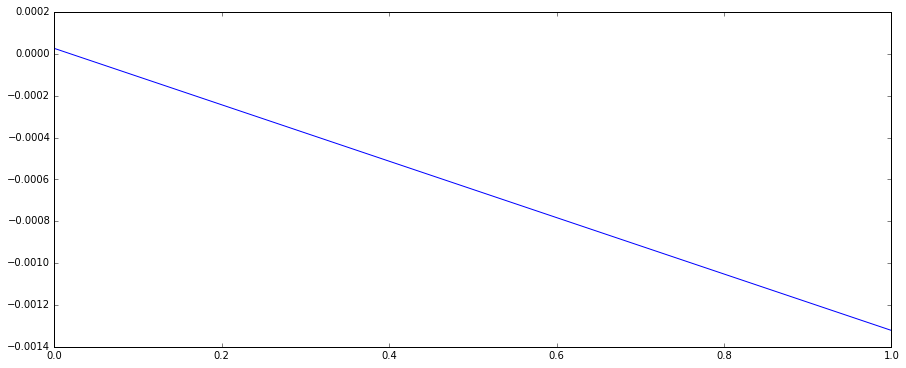

In [80]:
plt.plot(p)

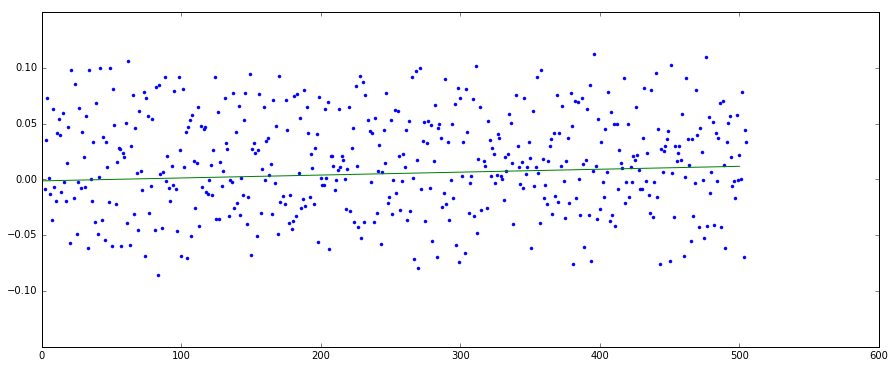

In [96]:
xp = np.linspace(1, 500, 100)
plt.plot(ts.index, ts.values, '.', xp, p(xp), '-')
plt.ylim(-.15,.15)

plt.show()

In [174]:
owned={}
for i in data.columns:
    owned[i]=0

In [274]:

def game(money, maxdays, threshold, sellthreshold):
    # INITIALIZE
    owned = {}
    for stock in data.columns:
        owned[stock] = 0
        
    # EARLY GAME
    
    # LATER GAME
     
    for N in range(4,maxdays):
        #print("DAY: ",N)
        linearmodels={}
        for i in data.columns:
            ts = log_diff(data[i][0:N])
            lm_log = np.polyfit(ts.index, ts.values, 1)
            p = np.poly1d(lm_log)
            linearmodels[i] = p

        sorted_x = sorted(linearmodels.items(), key=lambda k: k[1](N+1))
        buys = [bool(s[1](N+1)<threshold) for s in sorted_x]
        nbuys = sum(buys)

        # BUYING
        if nbuys>0:
            while money>=min([data[sorted_x[i][0]][N] for i in range(nbuys)]):
                for i in range(nbuys):
                    stock = sorted_x[i][0]
                    price = data[stock][N]
                    if money>= price:
                        owned[stock] += 1
                        money -= price
        # SELLING
        for stock in data.columns:
            price = data[stock][N]
            shares = owned[stock]
            if linearmodels[stock](N+1)>=sellthreshold:
                money += price*shares
                owned[stock] = 0
        #print money
    # SELL EVERYTHING
    N = maxdays
    for stock in data.columns:
        price = data[stock][N]
        shares = owned[stock]
        money += price*shares
        owned[stock] = 0
    
    #print money
    return money
        

In [290]:
money = 100
maxdays = 200
threshold = .0012 # most vals in [-.1, .1]
sellthreshold = -.00222
m = game(money, maxdays, threshold, sellthreshold)
print(m)
print(5*np.log(m))

246656.79
62.0787656759


In [286]:
results = []

money = 100
maxdays = 200
threshold = 0.00122
sellthreshold =  -0.00222
for i in range(6):
    for j in range(6):
        threshold += .00002
        sellthreshold -= .00002
        m = game(money, maxdays, threshold, sellthreshold)
        results.append(m)
        print("thresh. = {}, sellthresh = {}, money = {}".format(threshold, sellthreshold, m))
mx = max(results)        
print(mx, 5*np.log(mx))       

thresh. = 0.00124, sellthresh = -0.00224, money = 246100.01
thresh. = 0.00126, sellthresh = -0.00226, money = 241597.41
thresh. = 0.00128, sellthresh = -0.00228, money = 237548.31
thresh. = 0.0013, sellthresh = -0.0023, money = 243845.89
thresh. = 0.00132, sellthresh = -0.00232, money = 231114.69


KeyboardInterrupt: 

In [165]:
np.log(1.01)

0.009950330853168092

In [305]:
# Data import tests
prices = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
names = ['alice', 'bob', 'charlie', 'denise']
prices.insert(0,names)
prices = pd.DataFrame(prices)

print prices.head
print prices.index

prices.columns = prices.iloc[0]
prices = prices.reindex(prices.index.drop(0))

prices

<bound method DataFrame.head of        0    1        2       3
0  alice  bob  charlie  denise
1      1    2        3       4
2      5    6        7       8
3      9   10       11      12>
RangeIndex(start=0, stop=4, step=1)


,alice,bob,charlie,denise
1,1,2,3,4
2,5,6,7,8
3,9,10,11,12


In [295]:
data

,CAL,UCB,RIT,UCLA,UCSC,UFL,UMAD,RICE,UMD,BU
1,121.83,52.34,100.21,12.5,249.58,20.21,109.39,126.3,102.96,213.77
2,122.26,50.89,99.33,27.22,244.24,19.77,120.49,128,103.62,193.51
3,123.94,47.62,102.87,9.32,242.56,21.34,131.35,129.08,98.22,178.53
4,122.11,51.16,110.63,16.07,245.13,20.21,127.97,129.28,96.6,180.08
5,120.58,52.4,110.72,3.86,245.35,21.17,121.38,124.44,99.1,208.29
6,127.86,50.79,109.25,25.55,237.96,23.53,145.5,122.91,95.92,166.44
7,123.64,51.02,105.34,28.1,244.83,24.87,136.1,124.7,101.74,173.77
8,118.37,50.99,112.24,6.5,244.98,24.76,101.45,129.41,101.35,225.7
9,124.3,51.3,111.5,29.76,250.49,23.53,111.91,117.72,102.21,209.92
10,126.5,50.21,109.4,6.82,244.85,26.1,126.09,124.5,95.76,177.39


In [306]:
# temp saving
        mvavg=[]
        for stock in range(k):
            p = prices[stock]
            mvavg.append(sum(p[0:4])/4)
        ## sort stocks by p[4]-mvavg
        stocklist = sorted(range(k), key=lambda i: ((prices[i][4]-mvavg[i])/mvavg[i]))
        for stock in stocklist: # instead of range(k):
            p = prices[stock]            
            if money>0 and p[4]<mvavg[stock]:
                shares = money // p[4]
                if shares > 0:
                    txns += 1
                    txnlist.append('{} BUY {:g}'.format(name[stock], shares))
                    money -= shares*p[4]
            elif money>0 and p[4]>mvavg[stock] and owned[stock]>0:
                txns += 1
                txnlist.append('{} SELL {:g}'.format(name[stock], owned[stock]))
                #money += owned[stock]*p[4]

IndentationError: unexpected indent (<ipython-input-306-a62db9969234>, line 2)

In [ ]:
# THe algorithm above ends up using entire price history.  Instead we should only use 4 lags.